<a href="https://colab.research.google.com/github/onyekaokonji/Heart-Failure-Prediction/blob/main/HFP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [2]:
heart_data = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

In [3]:
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
heart_data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
# Check for correlations between features and target
correlation_matrix = heart_data.corr()
correlation_matrix['DEATH_EVENT'].sort_values(ascending= False)

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

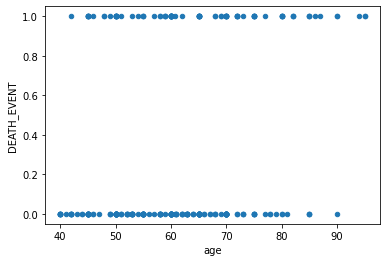

In [6]:
heart_data.plot(x = 'age', y = 'DEATH_EVENT', kind='scatter')

In [7]:
# Checking for balance or otherwise of the dataset
heart_data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

(array([203.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  96.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

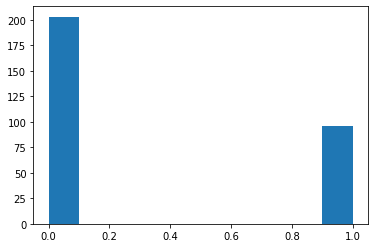

In [8]:
plt.hist(heart_data['DEATH_EVENT'])

In [9]:
X = heart_data.iloc[:, 0:12]
Y = heart_data.iloc[:, 12]

In [10]:
# scaling some columns of the dataset

s_scaler = StandardScaler()
X = s_scaler.fit_transform(X)

In [11]:
X

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, ...,
         7.35688190e-01, -6.87681906e-01, -1.62950241e+00],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00, ...,
         7.35688190e-01, -6.87681906e-01, -1.60369074e+00],
       [ 3.50832977e-01, -8.71104775e-01, -4.49938761e-01, ...,
         7.35688190e-01,  1.45416070e+00, -1.59078490e+00],
       ...,
       [-1.33339153e+00, -8.71104775e-01,  1.52597865e+00, ...,
        -1.35927151e+00, -6.87681906e-01,  1.90669738e+00],
       [-1.33339153e+00, -8.71104775e-01,  1.89039811e+00, ...,
         7.35688190e-01,  1.45416070e+00,  1.93250906e+00],
       [-9.12335403e-01, -8.71104775e-01, -3.98321274e-01, ...,
         7.35688190e-01,  1.45416070e+00,  1.99703825e+00]])

In [12]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2)

In [13]:
x_train

array([[ 5.19255428e-01, -8.71104775e-01, -3.80771328e-01, ...,
        -1.35927151e+00, -6.87681906e-01,  1.48080471e+00],
       [-7.02231493e-02,  1.14796753e+00, -4.41679963e-01, ...,
         7.35688190e-01, -6.87681906e-01, -6.22846997e-01],
       [-4.91279276e-01, -8.71104775e-01, -5.52141386e-01, ...,
         7.35688190e-01, -6.87681906e-01, -6.61564513e-01],
       ...,
       [ 7.71889104e-01, -8.71104775e-01,  2.18152074e+00, ...,
         7.35688190e-01, -6.87681906e-01,  1.50661639e+00],
       [ 9.81993013e-02, -8.71104775e-01, -3.62189032e-01, ...,
         7.35688190e-01,  1.45416070e+00, -1.55206738e+00],
       [-7.02231493e-02,  1.14796753e+00,  1.65728387e-04, ...,
        -1.35927151e+00, -6.87681906e-01, -4.55071094e-01]])

In [14]:
classifier = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
cls = classifier.fit(x_train, y_train)

In [15]:
x_test = cls.predict(x_val)

In [16]:
x_test

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0])

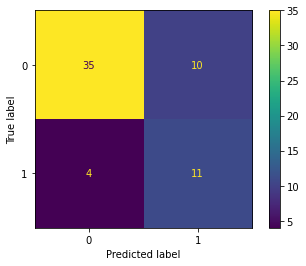

In [17]:
c_matrix = confusion_matrix(y_val, x_test, labels = cls.classes_)
c_matrix_display = ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels=cls.classes_)
c_matrix_display.plot()
plt.show()

In [19]:
# Computing Precision, Recall and F1-Score

target_names = ['Healthy', 'Heart Failure']
print(classification_report(y_val, x_test, target_names = target_names))

               precision    recall  f1-score   support

      Healthy       0.90      0.78      0.83        45
Heart Failure       0.52      0.73      0.61        15

     accuracy                           0.77        60
    macro avg       0.71      0.76      0.72        60
 weighted avg       0.80      0.77      0.78        60

